In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import pandas as pd
import seaborn

In [3]:
T1 = SuchTree( 'data/gopher-louse/gopher.tree' )
T2 = SuchTree( 'data/gopher-louse/lice.tree' )
links = pd.DataFrame.from_csv( 'data/gopher-louse/gopher-louse-associations.txt' )

#T1 = SuchTree( 'data/plant-pollinators/bahe/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/bahe/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/bahe/bahe_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/beeh/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/beeh/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/beeh/beeh_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/fros/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/fros/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/fros/fros_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/hrat/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/hrat/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/hrat/hrat_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/moma/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/moma/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/moma/moma_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/nnog/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/nnog/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/nnog/nnog_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/smal/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/smal/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/smal/smal_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wyth/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wyth/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wyth/wyth_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wes/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wes/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wes/wes_links.csv' )
#links = links[ T1.leafs.keys() ]
#links = links.T[ T2.leafs.keys() ]


SLT = SuchLinkedTrees( T1, T2, links )

host_aj,  host_node_ids  = T1.adjacency( T1.root ).values()
guest_aj, guest_node_ids = T2.adjacency( T2.root ).values()

host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()

140084350164576 allocating columns in 3991805560
bulding default subset.
bulding default link list.


(0, 15)

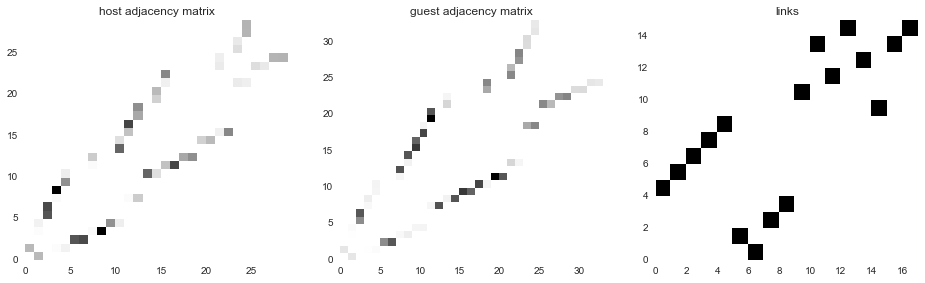

In [4]:
figure(figsize=(16,4.3))
subplot(1,3,1)
title('host adjacency matrix')
pcolor( host_aj )
xlim( (0,T1.length) )
ylim( (0,T1.length) )
subplot(1,3,2)
title('guest adjacency matrix')
pcolor( guest_aj )
xlim( (0,T2.length) )
ylim( (0,T2.length) )
subplot(1,3,3)
pcolor( links )
title('links')
xlim( (0,links.shape[1]) )
ylim( (0,links.shape[0]) )

In [5]:
guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , SLT.linklist[:,0] )
host_aj_links  = map( lambda x : host_node_ids.index(x),  SLT.linklist[:,1] )
zip(guest_aj_links, host_aj_links )

[(56, 27),
 (44, 16),
 (35, 6),
 (58, 9),
 (60, 19),
 (48, 5),
 (34, 5),
 (46, 18),
 (49, 6),
 (41, 17),
 (55, 26),
 (61, 20),
 (57, 28),
 (59, 13),
 (43, 22),
 (45, 8),
 (54, 25)]

In [6]:
aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()

for i,j in zip( random.permutation(guest_aj_links), random.permutation(host_aj_links ) ) :
#for i,j in zip( guest_aj_links, host_aj_links ) :
    aj[i,j] = 1.0
    aj[j,i] = 1.0

(0, 62)

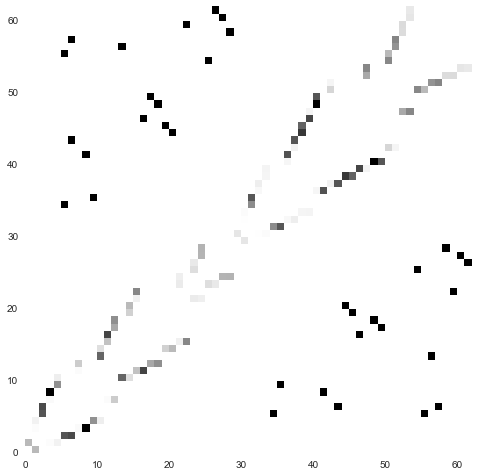

In [7]:
figure(figsize=(8,8))
pcolor(aj)
xlim( (0,aj.shape[0]) )
ylim( (0,aj.shape[1]) )

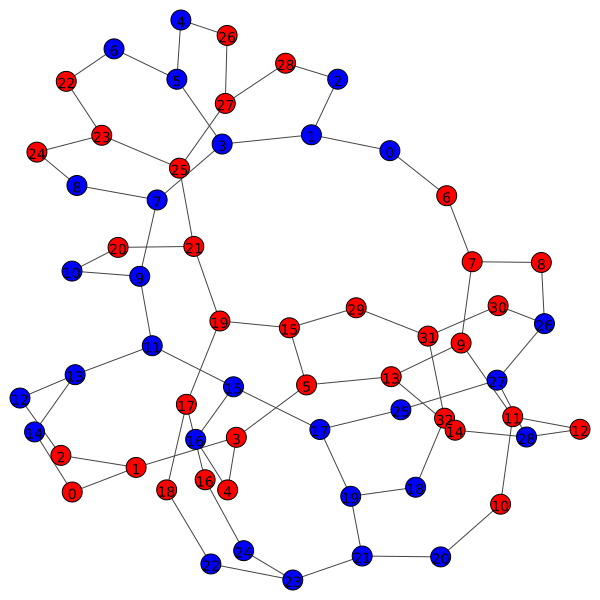

In [8]:
import igraph

g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
g.vs['label'] = host_node_ids + guest_node_ids
g.vs['tree'] = ['host']  * len( host_node_ids ) + ['guest'] * len( guest_node_ids )
color_dict = { 'host' : 'blue', 'guest' : 'red' }
g.vs['color'] = [color_dict[tree] for tree in g.vs["tree"]]
layout = g.layout_kamada_kawai()
igraph.plot( g, layout=layout, target='gophers.png' )

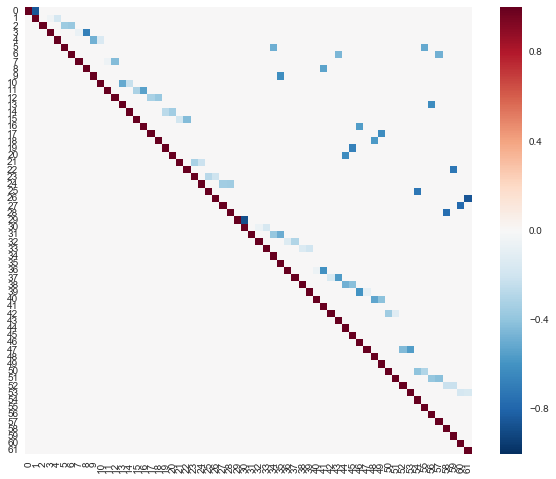

In [38]:
lp = matrix(g.laplacian( weights='weight', normalized=True ))

figure(figsize=(10,8))
seaborn.heatmap( triu(lp) )

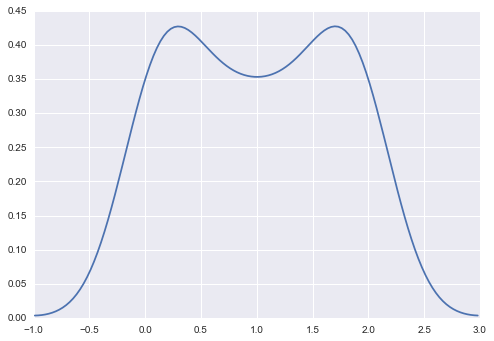

In [37]:
lambdas = linalg.eigvalsh( lp )
#plot(sorted(lambdas))
seaborn.kdeplot( lambdas )

In [46]:
def permute_links( linklist, deletions, additions, swaps ) :
    for i in xrange( deletions ) :
        linklist = delete( linklist, randint(len(linklist)), axis=0 )
    for i in xrange( swaps ) :
        x, y = random.choice( xrange( len(linklist) ), size=2, replace=False )
        X, Y = linklist[x,1], linklist[y,1]
        linklist[x,1] = Y
        linklist[y,1] = X
    for i in xrange( additions ) :
        a = random.choice( SLT.TreeA.leafs.values() )
        b = random.choice( SLT.TreeB.leafs.values() )
        linklist = numpy.concatenate( (linklist, array([[b,a]])), axis=0 )
    return linklist

def graph_spectral_density( SLT, deletions=0, additions=0, swaps=0, mode='lambdas' ) :
    
    linklist = permute_links( SLT.linklist, deletions, additions, swaps )
    
    host_aj,  host_node_ids  = SLT.TreeA.adjacency( SLT.TreeA.root ).values()
    guest_aj, guest_node_ids = SLT.TreeB.adjacency( SLT.TreeB.root ).values()
    
    host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()
    
    guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , linklist[:,0] )
    host_aj_links  = map( lambda x : host_node_ids.index(x), linklist[:,1] )
    zip(guest_aj_links, host_aj_links )
    
    aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
    aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
    aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()
    
    for i,j in zip( guest_aj_links, host_aj_links ) :
        aj[i,j] = 1.0
        aj[j,i] = 1.0
        
    if mode == 'adjacency' :
        return aj
    
    g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
    lp = matrix(g.laplacian( weights='weight', normalized=True ))
    
    if mode == 'laplacian' :
        return lp
    
    lambdas = linalg.eigvalsh( lp )
    return lambdas

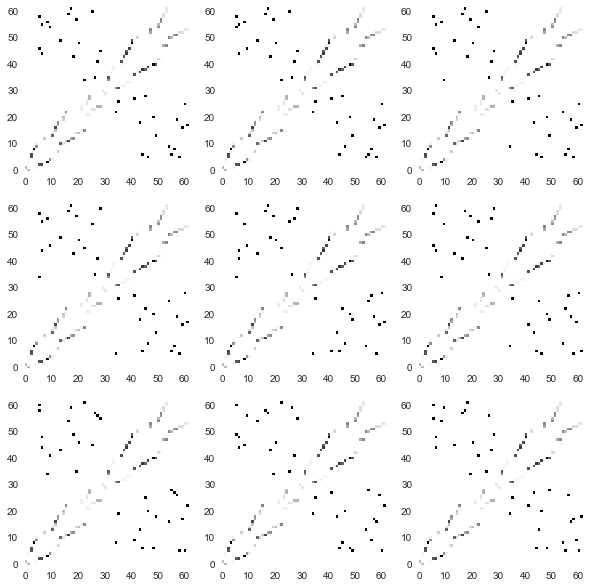

In [15]:
figure(figsize=(10,10))
for i in xrange( 9 ) :
    subplot(3,3,i+1)
    aj = graph_spectral_density( SLT, additions=0, deletions=0, swaps=i, mode='adjacency' )
    pcolor( aj )
    xlim( (0,aj.shape[1]) )
    ylim( (0,aj.shape[0]) )
    #xticks = []
    #yticks = []

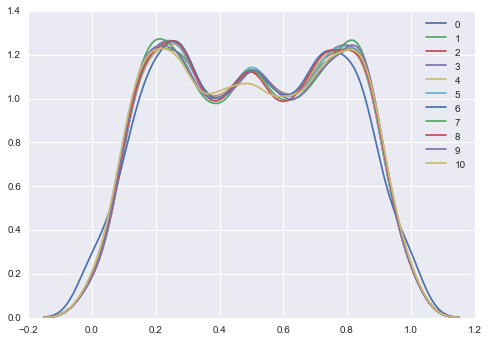

In [53]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=int(i), swaps=0 )
    seaborn.kdeplot( lambdas / lambdas.max(), label=int(i), bw=0.05 )
savefig( 'spectral-gophers.png' )

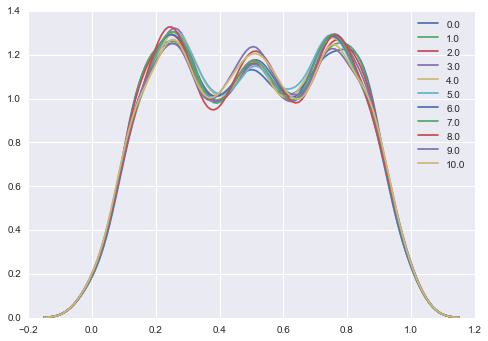

In [54]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=0, swaps=int(i) )
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.05 )

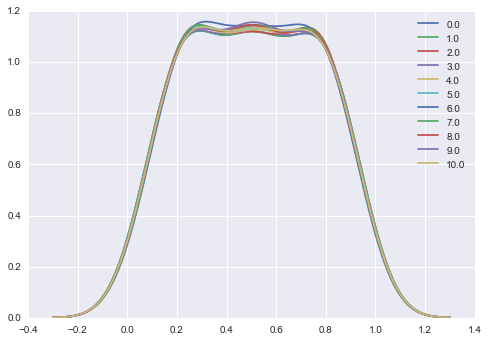

In [55]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=int(i), deletions=0, swaps=0 )
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.1 )

In [52]:
lambdas

array([ -2.60642202e-15,   1.42605534e-01,   1.86565233e-01,
         2.25225050e-01,   2.58506015e-01,   2.81987873e-01,
         2.92893219e-01,   2.95685984e-01,   3.42893672e-01,
         3.49196714e-01,   3.68636196e-01,   3.76584548e-01,
         4.04880262e-01,   4.17541824e-01,   4.44040030e-01,
         4.62246944e-01,   4.87931387e-01,   5.18625154e-01,
         5.52840200e-01,   5.58588357e-01,   5.71535859e-01,
         5.85592777e-01,   6.01396267e-01,   6.05946943e-01,
         6.70373847e-01,   6.82901506e-01,   7.10895037e-01,
         7.27383002e-01,   7.60601418e-01,   7.74394648e-01,
         7.87096419e-01,   8.26237461e-01,   8.38932457e-01,
         8.77804890e-01,   8.96035844e-01,   9.20259253e-01,
         9.51373353e-01,   9.75636014e-01,   1.00000000e+00,
         1.00000000e+00,   1.00257288e+00,   1.03495992e+00,
         1.06614220e+00,   1.09517305e+00,   1.14035714e+00,
         1.14988018e+00,   1.17135706e+00,   1.20303543e+00,
         1.21804305e+00,

In [ ]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def spectral_density( mgl ) :
    lambdas, vectors = linalg.eig( mgl )
    kde = gaussian_kde( lambdas / max( lambdas ) )
    return kde.pdf( linspace( -0.5,1.5,100) )

def pdd( a, b ) :
    return ( 0.5 * entropy( h_sd, g_sd ) + 0.5 * entropy( g_sd, h_sd ) )**(0.5)

#studies = [ { 'name' : 'Gopher, Lice',
#              'host' : 'data/gopher-louse/gopher.tree',
#              'guest': 'data/gopher-louse/lice.tree',
#              'links': 'data/gopher-louse/gopher-louse-associations.csv' },
#           
#            { 'name' : 'Fruit, Birds of Paradise',
#              'host' : 'data/plant-pollinators/beeh/plant.tree',
#              'guest': 'data/plant-pollinators/beeh/animal.tree',
#              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },
#          
#          ]

cases = []

progbar = pyprind.ProgBar( len(studies)*11**3, monitor=True, title='building space...' )
for study in studies :
    T1 = SuchTree( study['host'] )
    T2 = SuchTree( study['guest'] )
    links = pd.DataFrame.from_csv( study['links'] )
    links = links[ T1.leafs.keys() ]
    links = links.T[ T2.leafs.keys() ]
    SLT = SuchLinkedTrees( T1, T2, links )
    for i in linspace( 0, 10, 11 ) :
        for j in linspace( 0, 10, 11 ) :
            for k in linspace( 0, 10, 11 ) :
                progbar.update()
                lambdas = graph_spectral_density( SLT, additions=int(i), deletions=int(j), swaps=int(k) )
                sd = gaussian_kde( lambdas ).pdf( linspace( -0.5,1.5,100) )
                cases.append( { 'study'     : study['name'],
                                'deletions' : int(i),
                                'additions' : int(j),
                                'swaps'     : int(k),
                                'skew'      : real(skew( sd )),
                                'kurtosis'  : real(kurtosis( sd )),
                                'eigengap'  : real(sorted(lambdas)[-1] - sorted(lambdas)[-2] ) } )

S = pd.DataFrame( cases )[ ['study', 'additions', 'deletions', 'swaps', 'skew', 'kurtosis', 'eigengap'] ]

building space...
0%                          100%
[                              ]

140084192909024 allocating columns in 3834550008
bulding default subset.
bulding default link list.
140084339548240 freeing columns in 3981189224
140084339548240 freeing table 3981189224


[###                           ] | ETA: 00:01:13

140084339548240 allocating columns in 3981189224
bulding default subset.
bulding default link list.
140084192909024 freeing columns in 3834550008
140084192909024 freeing table 3834550008


[######                        ] | ETA: 00:01:18

140084192909024 allocating columns in 3834550008
bulding default subset.
bulding default link list.
140084339548240 freeing columns in 3981189224
140084339548240 freeing table 3981189224


/home/russell/opt/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


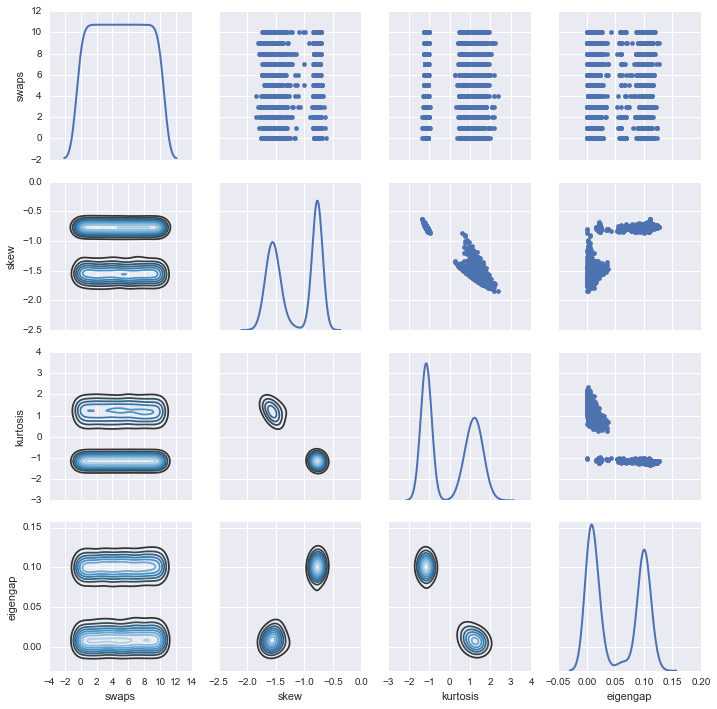

In [51]:
grid = seaborn.PairGrid(S[['swaps', 'skew', 'kurtosis', 'eigengap']], diag_sharey=False)
grid.map_lower(seaborn.kdeplot, cmap="Blues_d")
grid.map_upper(scatter)
grid.map_diag(seaborn.kdeplot, lw=2)

AttributeError: 'Series' object has no attribute 'find'

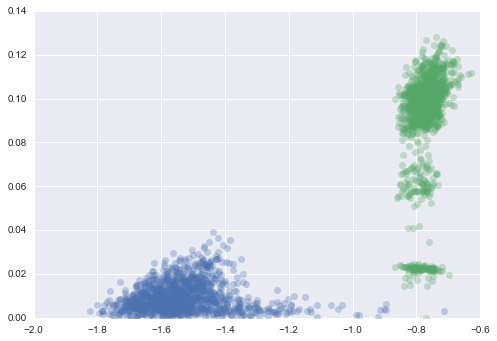

In [77]:
var1 = 'skew'
var2 = 'eigengap'

#study_names = [ 'Gopher, Lice', 'Fruit, Birds of Paradise' ]
#colors = [ 'red', 'blue' ]
study_names = map( lambda x : x['name'], studies )

for s in study_names :
    plot( S[ S['study'] == s][var1], 
          S[ S['study'] == s][var2],
          marker='o',
          lw=0,
          alpha=0.3,
          label=s)

xlabel( var1 )
ylabel( var2 )
originals = S[ ( S['additions'] == 0 ) & ( S['deletions'] == 0 ) & ( S['swaps'] == 0 ) ]
legend(loc=0)
plot( originals[var1], originals[var2], marker='v', lw=0, color='k' )

In [126]:
S[ ( S['additions'] == 0 ) & ( S['deletions'] == 0 ) & ( S['swaps'] == 0 ) ]

,study,additions,deletions,swaps,skew,kurtosis,eigengap
0,"Gopher, Lice",0,0,0,-0.83235127626,-0.799889299216,3.10862446895e-15
1331,"Fruit, Birds of Paradise",0,0,0,-0.83235127626,-0.799889299216,3.10862446895e-15


In [86]:
studies = [ { 'name' : 'Gopher, Lice',
              'host' : 'data/gopher-louse/gopher.tree',
              'guest': 'data/gopher-louse/lice.tree',
              'links': 'data/gopher-louse/gopher-louse-associations.csv' },
           
            { 'name' : 'Fruit, Birds of Paradise',
              'host' : 'data/plant-pollinators/beeh/plant.tree',
              'guest': 'data/plant-pollinators/beeh/animal.tree',
              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },

            { 'name' : 'arr1',
              'host' : 'data/plant-pollinators/arr1/plant.tree',
              'guest': 'data/plant-pollinators/arr1/animal_fixed_2.tree',
              'links': 'data/plant-pollinators/arr1/arr1_links.csv' },

            { 'name' : 'fros',
              'host' : 'data/plant-pollinators/fros/plant.tree',
              'guest': 'data/plant-pollinators/fros/animal.tree',
              'links': 'data/plant-pollinators/fros/fros_links.csv' },

            { 'name' : 'hrat',
              'host' : 'data/plant-pollinators/hrat/plant.tree',
              'guest': 'data/plant-pollinators/hrat/animal.tree',
              'links': 'data/plant-pollinators/hrat/hrat_links.csv' },

            { 'name' : 'moma',
              'host' : 'data/plant-pollinators/moma/plant.tree',
              'guest': 'data/plant-pollinators/moma/animal.tree',
              'links': 'data/plant-pollinators/moma/moma_links.csv' },
           
            { 'name' : 'nnog',
              'host' : 'data/plant-pollinators/nnog/plant.tree',
              'guest': 'data/plant-pollinators/nnog/animal.tree',
              'links': 'data/plant-pollinators/nnog/nnog_links.csv' },

            { 'name' : 'smal',
              'host' : 'data/plant-pollinators/smal/plant.tree',
              'guest': 'data/plant-pollinators/smal/animal.tree',
              'links': 'data/plant-pollinators/smal/smal_links.csv' },

            { 'name' : 'wyth',
              'host' : 'data/plant-pollinators/wyth/plant.tree',
              'guest': 'data/plant-pollinators/wyth/animal.tree',
              'links': 'data/plant-pollinators/wyth/wyth_links.csv' },

            { 'name' : 'wes',
              'host' : 'data/plant-pollinators/wes/plant.tree',
              'guest': 'data/plant-pollinators/wes/animal.tree',
              'links': 'data/plant-pollinators/wes/wes_links.csv' },
           
          ]

In [136]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def pdd( a, b ) :
    return ( 0.5 * entropy( a, b ) + 0.5 * entropy( b, a ) )**(0.5)

spd = zeros( ( len(studies), len(studies) ) )

progbar = pyprind.ProgBar( len(studies)**2, monitor=True, title='building space...' )
for i,study1 in enumerate(studies) :
    for j,study2 in enumerate(studies) :
        progbar.update()
        if i == j : continue
        
        T11 = SuchTree( study1['host'] )
        T12 = SuchTree( study1['guest'] )
        links1 = pd.DataFrame.from_csv( study1['links'] )
        links1 = links1[ T11.leafs.keys() ]
        links1 = links1.T[ T12.leafs.keys() ]
        SLT1 = SuchLinkedTrees( T11, T12, links1 )
        
        T21 = SuchTree( study2['host'] )
        T22 = SuchTree( study2['guest'] )
        links2 = pd.DataFrame.from_csv( study2['links'] )
        links2 = links2[ T21.leafs.keys() ]
        links2 = links2.T[ T22.leafs.keys() ]
        SLT2 = SuchLinkedTrees( T21, T22, links2 )
        
        eigenvals1 = graph_spectral_density( SLT1 )
        eigenvals2 = graph_spectral_density( SLT2 )
        
        
        gsdd1 = gaussian_kde( eigenvals1 / max( eigenvals1 ) ).pdf( linspace( -0.5,1.5,100) )
        gsdd2 = gaussian_kde( eigenvals2 / max( eigenvals2 ) ).pdf( linspace( -0.5,1.5,100) )
                
        spd[i,j] = pdd( gsdd1, gsdd2 )

building space...
0%                          100%
[#                             ] | ETA: 00:00:02

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[###                           ] | ETA: 00:00:03

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[#####                         ] | ETA: 00:00:05

140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding 

[######                        ] | ETA: 00:00:05

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[########                      ] | ETA: 00:00:05

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[#########                     ] | ETA: 00:00:05

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[############                  ] | ETA: 00:00:04

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[#############                 ] | ETA: 00:00:04

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[###############               ] | ETA: 00:00:03

140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding 

[################              ] | ETA: 00:00:03

140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding 

[##################            ] | ETA: 00:00:03

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[###################           ] | ETA: 00:00:02

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[####################          ] | ETA: 00:00:02

140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736


[#####################         ] | ETA: 00:00:02

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[#######################       ] | ETA: 00:00:01

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[#########################     ] | ETA: 00:00:01

140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding 

[##########################    ] | ETA: 00:00:00

140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding 

[###########################   ] | ETA: 00:00:00

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[############################  ] | ETA: 00:00:00

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding 

[############################# ] | ETA: 00:00:00

140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736
140621712624048 allocating columns in 188385736
bulding default subset.
bulding default link list.
140621712623568 freeing columns in 188385256
140621712623568 freeing table 188385256
140621712623568 allocating columns in 188385256
bulding default subset.
bulding default link list.
140621712622368 freeing columns in 188384056
140621712622368 freeing table 188384056
140621712622368 allocating columns in 188384056
bulding default subset.
bulding default link list.
140621712624048 freeing columns in 188385736
140621712624048 freeing table 188385736


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:11


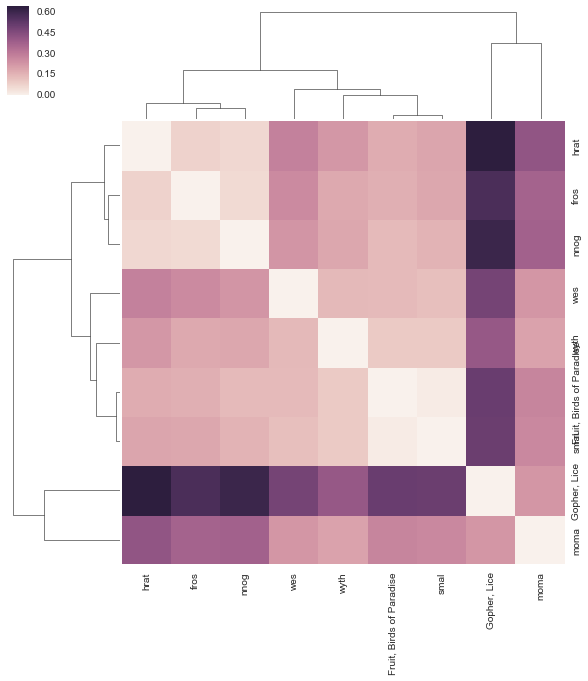

In [144]:
studynames = map( lambda x : x['name'], studies )
seaborn.clustermap( pd.DataFrame( spd, index=studynames, columns=studynames ) )

In [99]:
SLT2.TreeA.leafs

{'Abuta_sellowiana': 60,
 'Agonandra_sp1': 350,
 'Alchornea_glandulosa': 86,
 'Alchornea_triplinervia': 84,
 'Allibertia_mycifolia': 392,
 'Allophylus_edulis': 138,
 'Amaioua_intermedia': 284,
 'Andira_pisonis': 122,
 'Anthurium_crassipes': 386,
 'Anthurium_scandens': 388,
 'Aureliana_fasciculata': 302,
 'Aureliana_sp1': 304,
 'Bromelia_sp1': 402,
 'Bromelia_sp2': 404,
 'Cabralea_canjerana': 144,
 'Campomanesia_guaviroba': 150,
 'Campomanesia_neriiflora': 148,
 'Campomanesia_xanthocarpa': 146,
 'Carica_papaya': 124,
 'Casearia_decandra': 76,
 'Casearia_sylvestris': 74,
 'Cayaponia_sp1': 110,
 'Cecropia_glaziovi': 108,
 'Celtis_iguaneae': 96,
 'Clusia_criuva': 70,
 'Coccosypselum_hasserianum': 288,
 'Coccosypselum_krauseanum': 286,
 'Codonanthe_cordifolia': 298,
 'Cordia_corymbosa': 338,
 'Coussapoa_microcarpa': 98,
 'Coussarea_contracta': 290,
 'Cryptocarya_moschata': 44,
 'Cucumis_sp1': 116,
 'Cucurbitaceae_sp2': 114,
 'Cucurbitaceae_sp3': 112,
 'Cupania_vernalis': 134,
 'Cybianthus_p

In [86]:
graph_spectral_density( SLT2 )

ValueError: 36 is not in list

In [63]:
c = matplotlib.colors.Colormap(5)

c.N

256